In [1]:

#Convolution
from PIL import Image, ImageDraw
import numpy as np
from math import sqrt
from skimage.color import rgb2gray
from skimage import measure
from skimage import io
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from skimage.filters import threshold_otsu
from skimage import data, exposure, img_as_float
# Load image:
input_image = Image.open("domset1.png")
input_pixels = input_image.load()
width, height = input_image.width, input_image.height

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Convert to grayscale
intensity = np.zeros((width, height))
for x in range(width):
    for y in range(height):
        intensity[x, y] = sum(input_pixels[x, y]) / 3
index=0
# Compute convolution between intensity and kernels
for x in range(1, input_image.width - 1):
    for y in range(1, input_image.height - 1):
        magx = intensity[x + 1, y] - intensity[x - 1, y]
        magy = intensity[x, y + 1] - intensity[x, y - 1]

        # Draw in black and white the magnitude
        color = int(sqrt(magx**2 + magy**2))
        draw.point((x, y), (color, color, color))
    index = index + 1
            #print str(index) + " : " + str(r) + ", (x,y) = " + str(x) + ', ' + str(y)
output_image.save('edge.jpg')

In [2]:
# Read image. 
import cv2 
import numpy as np 
img = cv2.imread('edge.jpg', cv2.IMREAD_COLOR) 
  
# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 
  
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, 
               param2 = 30, minRadius = 1, maxRadius = 40) 
  
# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
        cv2.imshow("Detected Circle", img) 

In [102]:
import cv2
import numpy as np
import cv2
image = cv2.imread('edge.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# tweak the parameters of the GaussianBlur for best performance
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
# again, try different values here
edged = cv2.Canny(blurred, 20, 140)
(_, contours, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

ValueError: not enough values to unpack (expected 3, got 2)

In [62]:
from skimage import filters
from scipy import ndimage
import numpy as np
import scipy
import matplotlib.pyplot as plt
from skimage import io
im = io.imread("edge.jpg",as_gray=True);
val=filters.threshold_otsu(im)
drops=ndimage.binary_fill_holes(im<val)
original_grayscale = np.asarray(output_image.convert('L'), dtype=float)
blurred_grayscale = scipy.ndimage.filters.gaussian_filter(original_grayscale,sigma=5)
difference_image = original_grayscale - (7 * blurred_grayscale);
image_to_be_labeled = ((difference_image > val) * 255).astype('uint8')  # not sure if it is necessary

labelarray, particle_count = scipy.ndimage.measurements.label(image_to_be_labeled)

No dots


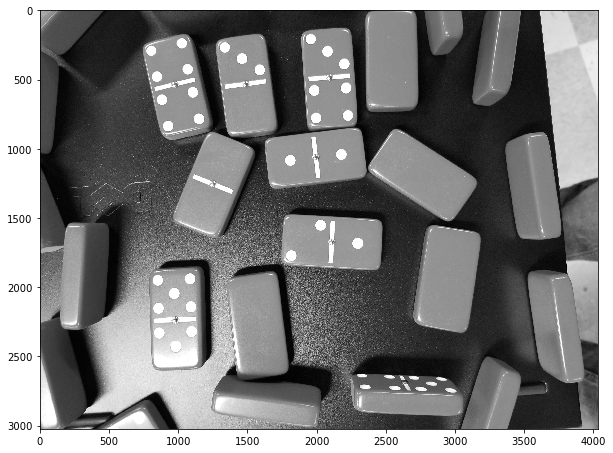

In [70]:
from skimage.feature import match_template
from skimage.transform import resize
from matplotlib.patches import Rectangle
from skimage.color import rgb2gray
from scipy.ndimage import label,find_objects
from numpy import copy
import matplotlib.pyplot as plt
from skimage import io

template=io.imread('template.png',as_gray=True)
def detect_dots(im,template,threshold=0.6,output_img=True,print_num=False,return_num=True):    
    im_c = copy(im)
    im = rgb2gray(im_c)
    dot = rgb2gray(template)
    
    temp_match = match_template(im,dot,pad_input=True) # use template matching to create image with peaks where matches are found
    
    thresh=0.6
    labeled_array, num_features = label(temp_match>thresh)
    slices = find_objects(labeled_array)
    numdots = len(slices)
    
    # print number of dots option
    if print_num == True:
        print(f"There are {numdots} dots.")
    else:
        pass
    
    # show output image option
    if output_img == True:
        fig,ax = plt.subplots(figsize=(10,10))
        ax.imshow(im_c,cmap='gray') # show color image
        
    # draw rectangles around dots
        for sl in slices :  
            dy,dx  = sl
            xy     = (dx.start, dy.start)
            width  = (dx.stop - dx.start +10)
            height = (dy.stop - dy.start +10)
            rect = Rectangle(xy,width,height,fc='none',ec='red',lw=2.5)
            ax.add_patch(rect,)
            ax.set_title("Detected dots")
            plt.show()
            output_image.save('edge3.jpg')
    # return integer number of dots option
    if return_num == True:
        return numdots
    else:
        print("No dots")
detect_dots(im,template,threshold=0.1,return_num=False)

In [67]:
import cv2
import numpy
img = cv2.imread('edge.jpg')   
# apply medianBlur to smooth image before threshholding
blur= cv2.medianBlur(img, 7) # smooth image by 7x7 pixels, may need to adjust a bit
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)


output = img.copy()
    # apply threshhold color to white (255,255, 255) and the rest to black(0,0,0)
mask = cv2.inRange(blur,lower,upper) 

circles = cv2.HoughCircles(mask,cv2.HOUGH_GRADIENT,1,20,param1=20,param2=8,
                               minRadius=0,maxRadius=60)    
index = 0
if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")

        # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
            # draw the circle in the output image, 
            #   then draw a rectangle corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (255, 0, 255), 2)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (255, 0, 255), -1)

        index = index + 1
            #print str(index) + " : " + str(r) + ", (x,y) = " + str(x) + ', ' + str(y)
    print ('No. of circles detected = {}'.format(index))

NameError: name 'lower' is not defined

No. of circles detected = 1
No. of circles detected = 2
No. of circles detected = 3
No. of circles detected = 4
No. of circles detected = 5
No. of circles detected = 6
No. of circles detected = 7
No. of circles detected = 8
No. of circles detected = 9
No. of circles detected = 10
No. of circles detected = 11
No. of circles detected = 12
No. of circles detected = 13
No. of circles detected = 14
No. of circles detected = 15
No. of circles detected = 16
No. of circles detected = 17
No. of circles detected = 18
No. of circles detected = 19
No. of circles detected = 20
No. of circles detected = 21
No. of circles detected = 22
No. of circles detected = 23
No. of circles detected = 24
No. of circles detected = 25
No. of circles detected = 26
No. of circles detected = 27
No. of circles detected = 28
No. of circles detected = 29
No. of circles detected = 30
No. of circles detected = 31
No. of circles detected = 32
No. of circles detected = 33
No. of circles detected = 34
No. of circles detected

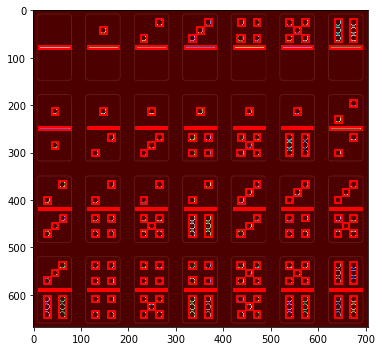

NameError: name 'templateGray' is not defined

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data

from skimage.segmentation import clear_border
from skimage.morphology import label, closing, square
from skimage.measure import regionprops
from skimage.color import label2rgb


image = io.imread('edge.jpg',as_gray=True);

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(5))

# remove artifacts connected to image border
cleared = bw.copy()
clear_border(cleared)

# label image regions
label_image = label(cleared)
borders = np.logical_xor(bw, cleared)
label_image[borders] = -1
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(image_label_overlay)
index=0
for region in regionprops(label_image):

    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    index = index + 1
            #print str(index) + " : " + str(r) + ", (x,y) = " + str(x) + ', ' + str(y)
    print ('No. of circles detected = {}'.format(index))
  
plt.show()
import numpy as np
import cv2


template= io.imread('template2.png',as_gray=True);


# resize images
image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
#template = cv2.resize(template, (0,0), fx=0.5, fy=0.5)

# Convert to grayscale


# Find template
result = cv2.matchTemplate(imageGray,cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
h,w = templateGray.shape
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(image,top_left, bottom_right,(0,0,255),4)

# Show result
cv2.imshow("Template", template)
cv2.imshow("Result", image)

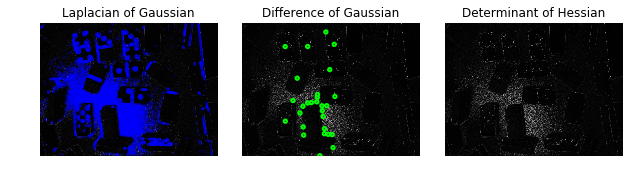

In [91]:
from math import sqrt 
from skimage import data
from skimage import io
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
im = io.imread('edge.jpg',as_gray=True); 
image = rgb2gray(im)
image_gray = rgb2gra  y(im)
blobs_log = blob_log(image_gray, max_sigma=50, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.5)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=0.1)
blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['blue', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(im,cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()